# Prediction of whether an observed stellar body is either a galaxy or a star.
Dataset: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS\
alpha = Right Ascension angle (at J2000 epoch)\
delta = Declination angle (at J2000 epoch)\
u = Ultraviolet filter in the photometric system\
g = Green filter in the photometric system\
r = Red filter in the photometric system\
i = Near Infrared filter in the photometric system\
z = Infrared filter in the photometric system\
run_ID = Run Number used to identify the specific scan\
rereun_ID = Rerun Number to specify how the image was processed\
cam_col = Camera column to identify the scanline within the run\
field_ID = Field number to identify each field\
spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)\
class = object class (galaxy, star or quasar object)\
redshift = redshift value based on the increase in wavelength\
plate = plate ID, identifies each plate in SDSS\
MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken\
fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Read Data
data = pd.read_csv("star_classification.csv")
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
data = data[(data['class'] == 'GALAXY') | (data['class'] == 'STAR')]

In [7]:
data.drop(['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'cam_col', 'spec_obj_ID', 'MJD', 'plate', 'fiber_ID', 'alpha', 'delta'], axis=1, inplace=True)

/tmp/ipython-input-3128432883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'cam_col', 'spec_obj_ID', 'MJD', 'plate', 'fiber_ID', 'alpha', 'delta'], axis=1, inplace=True)


In [9]:
# Class 0 is GALAXY & Class 1 is STAR
encoder = LabelEncoder()
data['class'] = encoder.fit_transform(data['class'])

/tmp/ipython-input-2676924578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = encoder.fit_transform(data['class'])


In [11]:
data.head()

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123


In [12]:
train, test = train_test_split(data, test_size = .2, random_state = 42, shuffle = True)

In [13]:
features = ['u', 'g', 'r', 'i', 'z', 'redshift']
X_train = train[features]
X_test = test[features]
y_train = train['class']
y_test = test['class']

In [16]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import itertools

In [17]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.fit_transform(X_test.values)

In [18]:
X_tensor = torch.from_numpy(X_train).float()
y_tensor = torch.from_numpy(y_train.values).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test.values).float()

In [19]:
batch_size = 1024
y_tensor = y_tensor.unsqueeze(1)

In [20]:
train_ds = TensorDataset(X_tensor, y_tensor)
train_dl = DataLoader(train_ds, batch_size=batch_size)

In [21]:
y_test = y_test_tensor.unsqueeze(1)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_ds, batch_size=batch_size)

In [22]:
# Defining the Neural Network
n_input_dim = X_train.shape[1]

# Layers
n_hidden1 = 300
n_hidden2 = 100
n_output = 1

In [23]:
class StarModel(nn.Module):
    def __init__(self):
        super(StarModel, self).__init__()
        self.layer_1 = nn.Linear(n_input_dim, n_hidden1)
        self.layer_2 = nn.Linear(n_hidden1, n_hidden2)
        self.layer_out = nn.Linear(n_hidden2, n_output)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.1)
        self.batchnorm1 = nn.BatchNorm1d(n_hidden1)
        self.batchnorm2 = nn.BatchNorm1d(n_hidden2)

    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.sigmoid(self.layer_out(x))

        return x
model = StarModel()
print(model)

StarModel(
  (layer_1): Linear(in_features=6, out_features=300, bias=True)
  (layer_2): Linear(in_features=300, out_features=100, bias=True)
  (layer_out): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [24]:
# Loss Computation
loss_func = nn.BCELoss()

# Optimizer
learning_rate = 0.001

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
epochs = 50

Last iteration loss value:0.044965874403715134


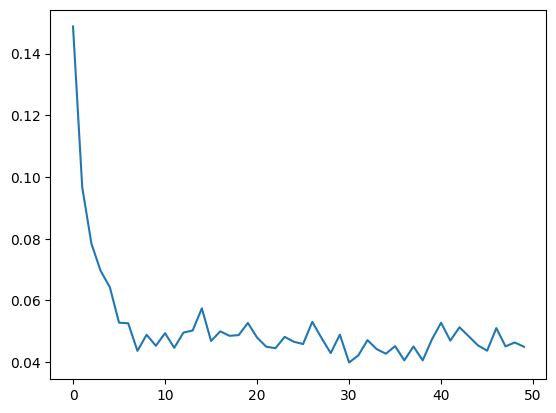

In [25]:
# Training the model
train_loss = []
for epoch in range(epochs):
    for x_batch, y_batch in train_dl:
        y_pred = model(x_batch)
        loss = loss_func(y_pred, y_batch.flatten(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss.append(loss.item())
print('Last iteration loss value:' + str(loss.item()))
plt.plot(train_loss)
plt.show()

In [26]:
y_pred_list = []
model.eval()

with torch.no_grad():
    for x_batch_test, y_batch_test in test_loader:
        y_test_pred = model(x_batch_test)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.detach().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_test_pred = list(itertools.chain.from_iterable(y_pred_list))

In [27]:
y_true_test = y_test.ravel()
cm = confusion_matrix(y_true_test, y_test_pred)
print("Confusion Matrix of the Test Set")
print("-----------")
print(cm)
print("Precision:"+str(precision_score(y_true_test, y_test_pred)))
print("Recall:"+str(recall_score(y_true_test, y_test_pred)))
print("F1 Score:"+str(f1_score(y_true_test, y_test_pred)))

Confusion Matrix of the Test Set
-----------
[[7444 4443]
 [   0 4321]]
Precision:0.49303970789593793
Recall:1.0
F1 Score:0.6604508979747803
